In [1]:
from google.colab import files

uploaded = files.upload()

Saving final_data.csv to final_data.csv


# Spracovanie dát

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("final_data.csv", parse_dates=['datetime'])
df['hour'] = df['datetime'].dt.hour
hourly_df = df.groupby(['nazov', 'hour'], as_index=False)['pocet_total'].sum()
profile_df = hourly_df.pivot(index='nazov', columns='hour', values='pocet_total').fillna(0)
profile_normalized = profile_df.div(profile_df.sum(axis=1), axis=0)
print(profile_normalized.head())


hour                           0         1         2         3         4   \
nazov                                                                       
#1 - Starý Most          0.002593  0.001385  0.000878  0.000910  0.001641   
#10 - Dunajská           0.003703  0.001194  0.000790  0.000565  0.000645   
#11 - Most Apollo        0.003167  0.003328  0.000834  0.000614  0.001837   
#12 - Železná studnička  0.000089  0.000049  0.000025  0.000034  0.000135   
#13 - Vajanského 1       0.003182  0.001447  0.000863  0.000832  0.001784   

hour                           5         6         7         8         9   \
nazov                                                                       
#1 - Starý Most          0.010869  0.035803  0.081686  0.099963  0.053810   
#10 - Dunajská           0.003260  0.010437  0.044682  0.072434  0.055557   
#11 - Most Apollo        0.009447  0.025161  0.044622  0.057521  0.044225   
#12 - Železná studnička  0.001555  0.008380  0.018971  0.031859  0.049816  

# Klustrovanie

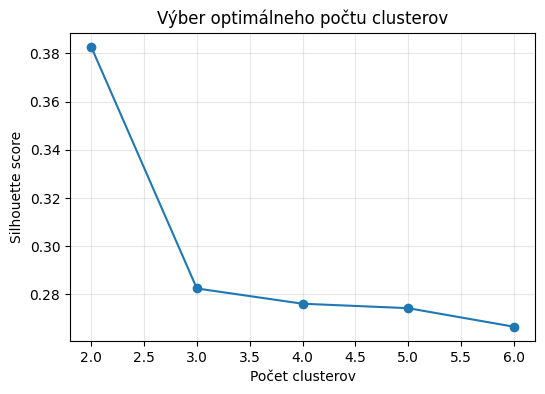

Najlepší počet clusterov podľa Silhouette score: 2


In [19]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

profile_data = profile_normalized.drop(columns=['cluster'], errors='ignore')

sil_scores = []
cluster_range = range(2, 7)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(profile_data)
    score = silhouette_score(profile_data, labels)
    sil_scores.append(score)

plt.figure(figsize=(6,4))
plt.plot(cluster_range, sil_scores, marker='o')
plt.xlabel("Počet clusterov")
plt.ylabel("Silhouette score")
plt.title("Výber optimálneho počtu clusterov")
plt.grid(alpha=0.3)
plt.show()

best_k = cluster_range[np.argmax(sil_scores)]
print(f"Najlepší počet clusterov podľa Silhouette score: {best_k}")

In [ ]:
# Vizualizácie

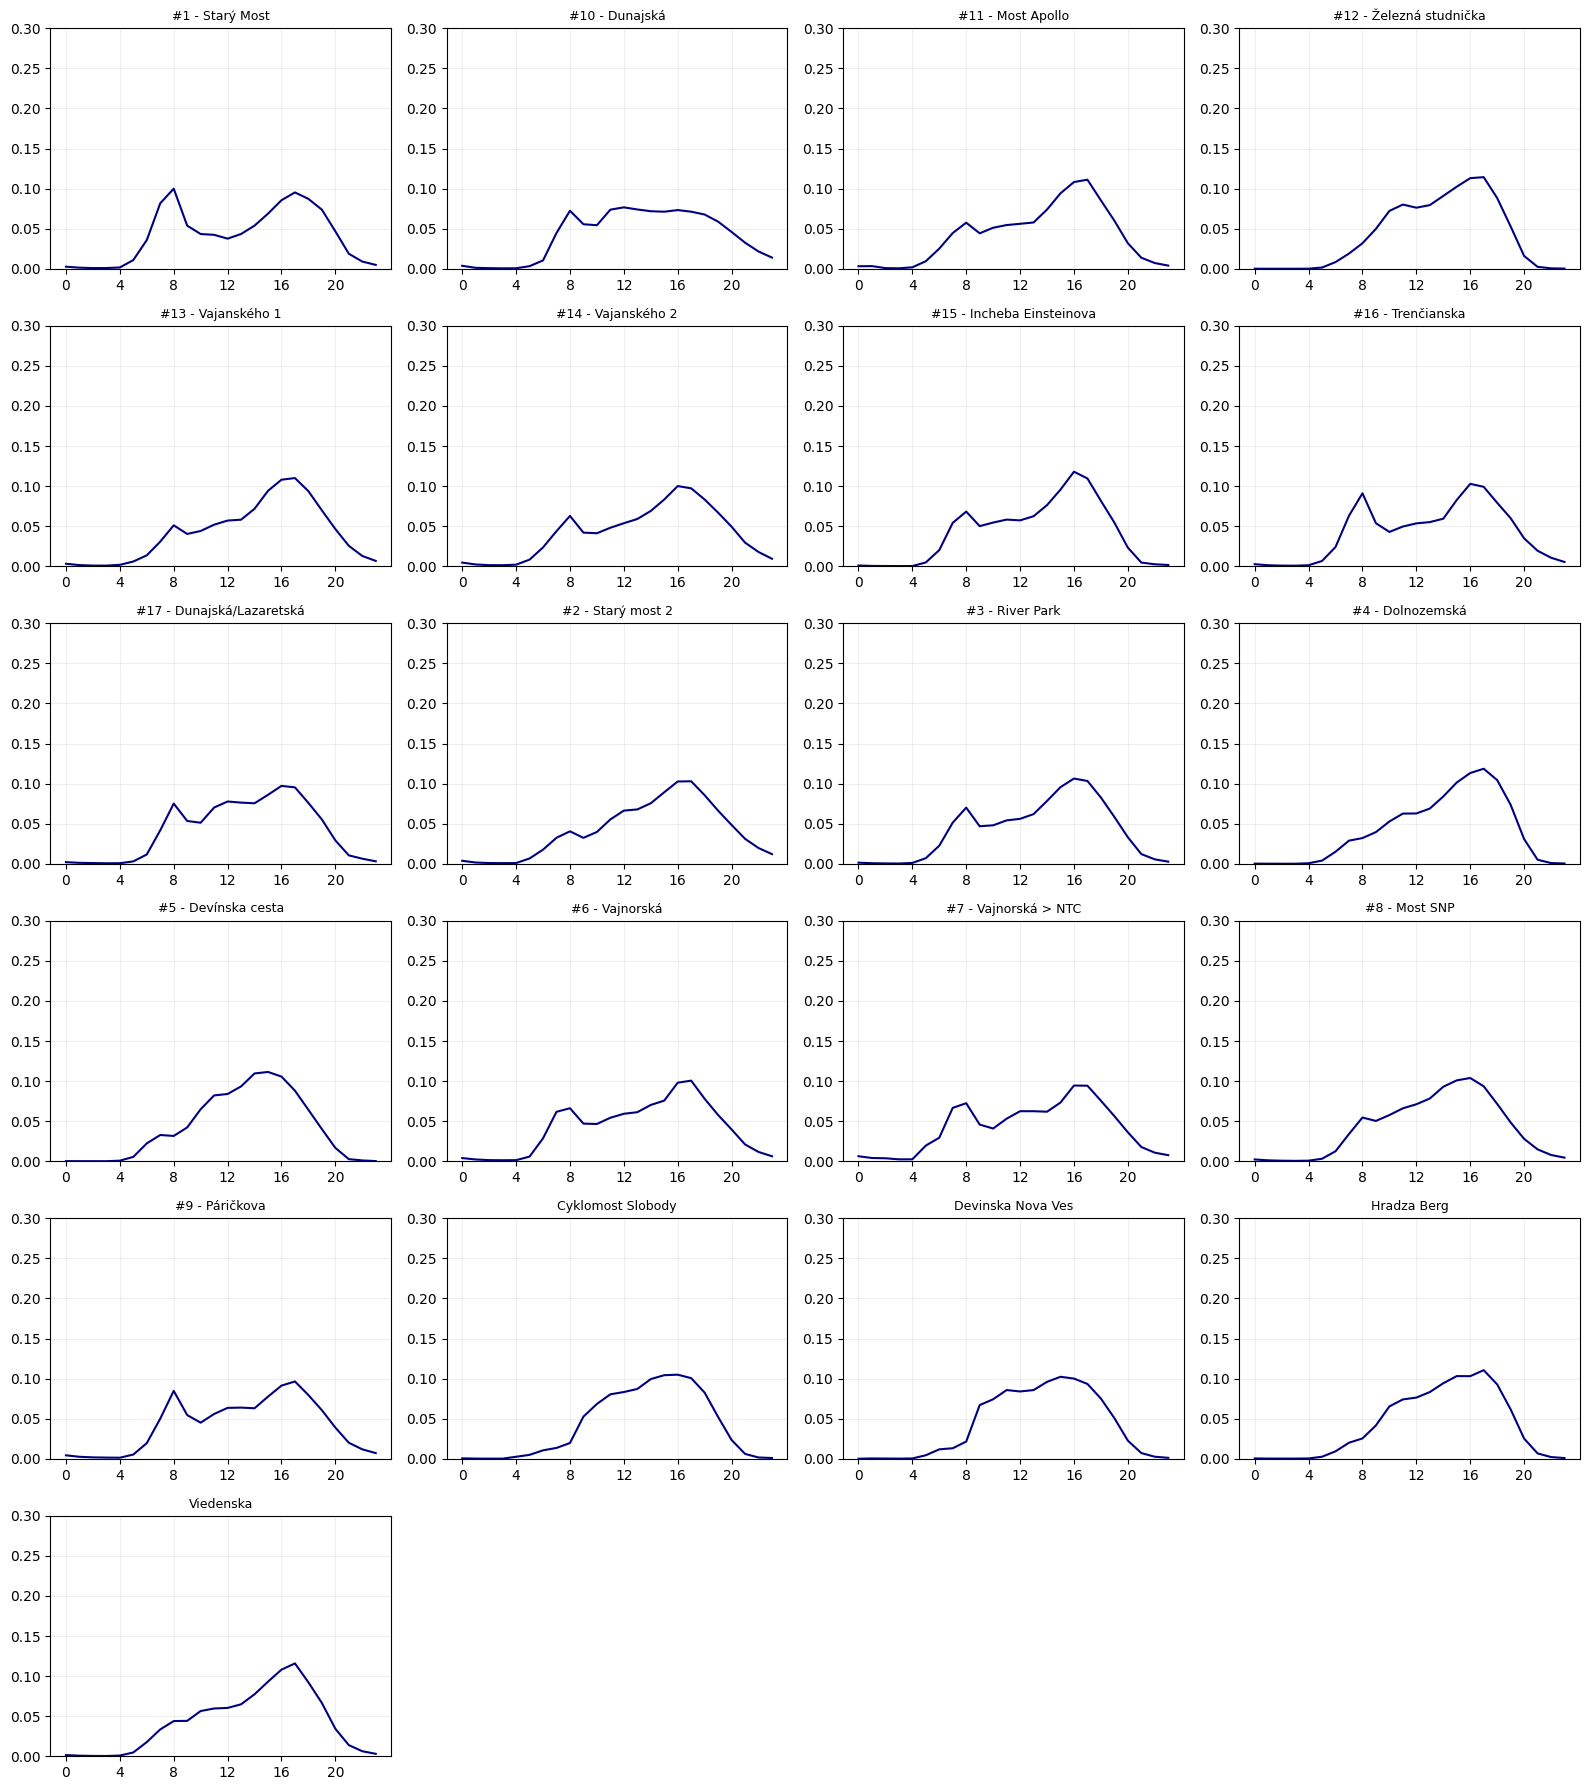

In [9]:
# vizualizácia všetkých časových profilov
import matplotlib.pyplot as plt
import math

plot_data = profile_normalized.drop(columns=['cluster'], errors='ignore')
n_trails = plot_data.shape[0]
n_cols = 4
n_rows = math.ceil(n_trails / n_cols)

plt.figure(figsize=(4*n_cols, 3*n_rows))

for i, (idx, row) in enumerate(plot_data.iterrows()):
    plt.subplot(n_rows, n_cols, i+1)
    plt.plot(range(24), row.values, color='navy')
    plt.title(f"{row.name}", fontsize=9)
    plt.xticks(range(0,24,4))
    plt.ylim(0,0.3)
    plt.grid(alpha=0.2)

plt.tight_layout()
plt.show()



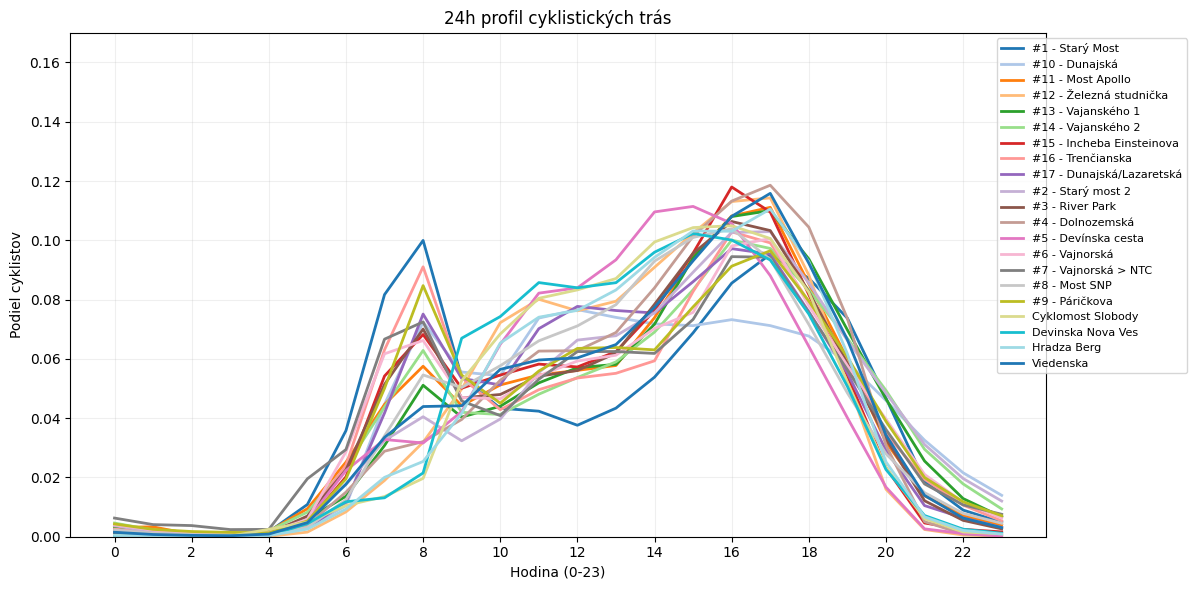

In [14]:
# všetky časové profily na jednom grafe
import matplotlib.pyplot as plt
import seaborn as sns

plot_data = profile_normalized.drop(columns=['cluster'], errors='ignore')

plt.figure(figsize=(12,6))
palette = sns.color_palette("tab20", n_colors=plot_data.shape[0])
for i, (idx, row) in enumerate(plot_data.iterrows()):
    plt.plot(range(24), row.values, color=palette[i], label=str(row.name), linewidth=2)

plt.xlabel("Hodina (0-23)")
plt.ylabel("Podiel cyklistov")
plt.title("24h profil cyklistických trás")
plt.xticks(range(0,24,2))
plt.ylim(0,0.17)
plt.grid(alpha=0.2)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), fontsize=8)
plt.tight_layout()
plt.show()


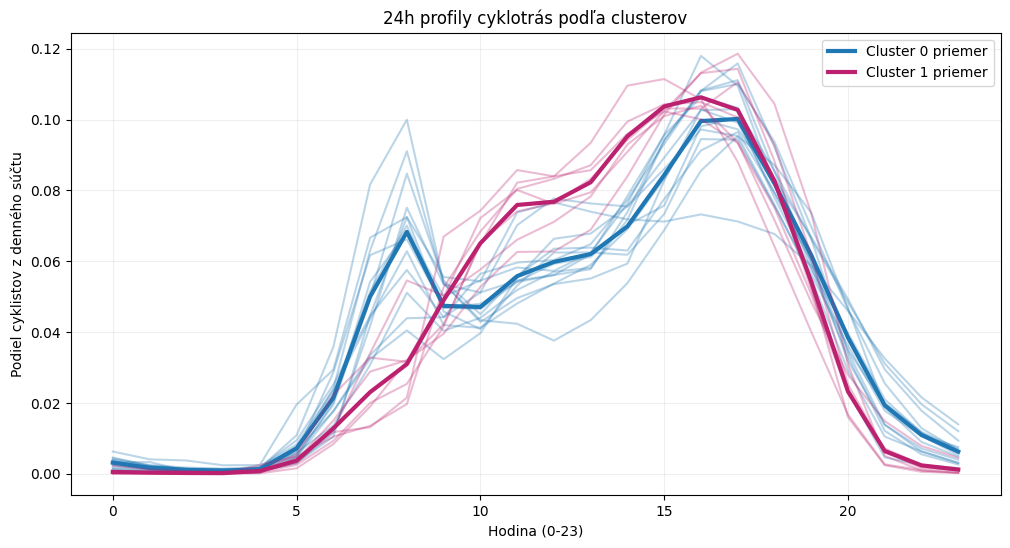

In [15]:
#2 clustre
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

clusters = profile_normalized['cluster'].unique()
colors = ['#1f77b4', '#BC216F']

plt.figure(figsize=(12,6))
for i, cluster in enumerate(clusters):
    cluster_data = profile_normalized[profile_normalized['cluster']==cluster].drop(columns='cluster')
    for idx, row in cluster_data.iterrows():
        plt.plot(range(24), row.values, color=colors[i], alpha=0.3)
    mean_profile = cluster_data.mean()
    plt.plot(range(24), mean_profile.values, color=colors[i], linewidth=3, label=f'Cluster {cluster} priemer')

plt.xlabel("Hodina (0-23)")
plt.ylabel("Podiel cyklistov z denného súčtu")
plt.title("24h profily cyklotrás podľa clusterov")
plt.legend()
plt.grid(alpha=0.2)
plt.show()


In [18]:
# zoznam a názvy clusterov
profile_normalized.index = df['nazov'].unique()  # nastavíme index na názvy trás
clusters = profile_normalized['cluster'].unique()

for cluster in clusters:
    names = profile_normalized[profile_normalized['cluster'] == cluster].index.tolist()
    print(f"\nCluster {cluster} ({len(names)} trás):")
    for n in names:
        print(f"- {n}")


Cluster 0 (14 trás):
- #1 - Starý Most
- #10 - Dunajská
- #11 - Most Apollo
- #13 - Vajanského 1
- #14 - Vajanského 2
- #15 - Incheba Einsteinova
- #16 - Trenčianska
- #17 - Dunajská/Lazaretská
- #2 - Starý most 2
- #3 - River Park
- #6 - Vajnorská
- #7 - Vajnorská > NTC
- #9 - Páričkova
- Viedenska

Cluster 1 (7 trás):
- #12 - Železná studnička
- #4 - Dolnozemská
- #5 - Devínska cesta
- #8 - Most SNP
- Cyklomost Slobody
- Devinska Nova Ves
- Hradza Berg
